<center> <h1> Project: France Traffic</h1> </center>
<img src="https://i.imgur.com/JPsW8Le.jpeg" style="width:1920px;height:600px;">

# Table of Contents
- [1 - Introduction](#intro)
    - [1.1 Importing Libraries](#il)
- [2 - Data Wrangling](#wrangling)
    - [2.1 - importing Data](#id)
    - [2.2 - Cleaning Data](#cd)
        - [2.2.1 - Remove nulls](#rn)
        - [2.2.2 - Remove Outliers](#ro)
    - [2.3 - Creating new columns](#cn)
- [3 - Exploratory Data Analysis](#eda)
    - [3.1 - Histogram](#hs)
    - [3.2 - Plot](#pl)
    - [3.3 - HeatMap](#htm)
- [4 - Deep Learning Model](#model)
    -[Dimension Reduction](#dr)
    - [Spliting Data](#sd)
    - [Training Model](#tm)
    - [Evaluate Model](#em)
- [5 - Conclusions](#conclusions)
     - [5.1 - Limitations](#lm)

<a id='intro'></a>
# Introduction

##### Title_categories Column:

- `IMAGINE R` : combines the annual Imagine R School and Imagine R Student packages reserved for pupils, apprentices and students which allows to travel at will all year round and in all of Ile-de-France.
- `NAVIGO` : includes the Navigo Annuel, Navigo Mois and Navigo Semaine packages.
- `AMETHYSTE` : includes the Amethyst packages: package reserved for seniors or disabled under conditions of means or status, and residing in the Île-de-France region.
- `TST` : groups together weekly and monthly reduced fare packages granted to beneficiaries of the Transportation Solidarity Reduction program, to travel within the selected zones in all the modes of transport in the Île-de-France region.
- `FGT` : accounts for the Navigo Gratuité Transport Packages, a package that allows certain receiving social assistance to travel free of charge throughout the Paris Region.
- `OTHER TITLE` : accounts for special packages.
- `NON DEFINED` : records validations for which the type of ticket is not defined (anomalies).

##### NB_VALID :  Number of validations. 1 validation = 1 person
##### ID REFA LDA : `-1`  means that the data is not defined.

<a id='il'></a>

In [1]:
#importing Libraries for exploring and Visualize Data
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
In this section we will load data and perform some cleaning for the data finding duplicates and missing value editing the data type of the columns

<a id='id'></a>

### Importing Data 
Load data and explore it and make some notes for analysis later

In [2]:
# Load data
df=pd.read_csv('../input/public-transport-traffic-data-in-france/Travel_titles_validations_in_Paris_and_suburbs.csv')
df.head()

,DATE,STATION_NAME,ID_REFA_LDA,TITLE_CATEGORY,NB_VALID
0,21/07/2019,LA TOUR MAUBOURG,71242.0,NAVIGO,1141
1,21/07/2019,PARMENTIER,71801.0,NOT DEFINED,Less than 5
2,21/07/2019,PARMENTIER,71801.0,TST,97
3,21/07/2019,PEREIRE-LEVALLOIS,71453.0,FGT,53
4,21/07/2019,PERNETY,412687.0,OTHER,36


In [3]:
#rows and columns 
df.shape

(883958, 5)

In [4]:
#information about data
# check data type of each coulmn
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883958 entries, 0 to 883957
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            883958 non-null  object 
 1   STATION_NAME    883958 non-null  object 
 2   ID_REFA_LDA     882459 non-null  float64
 3   TITLE_CATEGORY  883958 non-null  object 
 4   NB_VALID        883958 non-null  object 
dtypes: float64(1), object(4)
memory usage: 33.7+ MB


In [5]:
#some statistical information about data
df.describe()

,ID_REFA_LDA
count,882459.000000
mean,69150.277691
std,27606.821859
min,-1.000000
25%,66338.000000
50%,71158.000000
75%,71756.000000
max,415852.000000


In [6]:
#check for removing -1 values
df.ID_REFA_LDA.nunique

<bound method IndexOpsMixin.nunique of 0          71242.0
1          71801.0
2          71801.0
3          71453.0
4         412687.0
            ...   
883953     74040.0
883954     73653.0
883955     71673.0
883956     71043.0
883957     73650.0
Name: ID_REFA_LDA, Length: 883958, dtype: float64>

<a id='cd'></a>
## Data Cleaning
i'm going to clean my data, to ensure that the data if ready for my analysis.
### Removing Nulls
<a id='rn'></a>

In [7]:
#check null values
df.isnull().sum()

DATE                 0
STATION_NAME         0
ID_REFA_LDA       1499
TITLE_CATEGORY       0
NB_VALID             0
dtype: int64

In [8]:
#Drop null values 
df.dropna(inplace=True)
df.shape

(882459, 5)

In [9]:
#confirmation of data is clean from 
df.isnull().sum().any()

False

- Note: 
 There is null values in form of 0 value in the integer and float datatype.
 it may be wrong values or it is correct depend on the column as `0 in the year or month column is null value` 
 But in another columns like arr_delay or arr_cancelled 0 is a valued number 

In [10]:
#Number of 0 values 
for column_name in df.columns:
    column = df[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  DATE  is :  0
Count of zeros in column  STATION_NAME  is :  0
Count of zeros in column  ID_REFA_LDA  is :  0
Count of zeros in column  TITLE_CATEGORY  is :  0
Count of zeros in column  NB_VALID  is :  0


### Checking for Duplicates

In [11]:
#check Duplicates
df.duplicated().sum()

1241

In [12]:
#remove duplicate but leave one 
df.drop_duplicates(keep='first',inplace=True)
df.shape

(881218, 5)

In [13]:
#showing -1 values in ID_REFA_LDA
df.query('ID_REFA_LDA == -1')

,DATE,STATION_NAME,ID_REFA_LDA,TITLE_CATEGORY,NB_VALID
98,21/07/2019,VILLETANEUSE U,-1.0,IMAGINE R,130
99,21/07/2019,PIERREFITTE T11,-1.0,?,Less than 5
100,21/07/2019,DUGNY COURNEUVE,-1.0,AMETHYSTE,11
274,21/07/2019,ROSA PARKS,-1.0,TST,633
1038,19/08/2019,Inconnu,-1.0,OTHER,43
...,...,...,...,...,...
883338,29/08/2019,STAINS CERISAIE,-1.0,FGT,176
883339,29/08/2019,BOURGET T11,-1.0,NAVIGO,1528
883488,29/08/2019,ROSA PARKS,-1.0,AMETHYSTE,142
883489,29/08/2019,ROSA PARKS,-1.0,FGT,441


In [14]:
#drop -1 as it is a undefind value for the data so it looks like null value
df.drop(df[df.ID_REFA_LDA == -1].index, inplace=True)

In [15]:
#showing Less than 5 values in NB_VALID
df.query('NB_VALID == "Less than 5"')

,DATE,STATION_NAME,ID_REFA_LDA,TITLE_CATEGORY,NB_VALID
1,21/07/2019,PARMENTIER,71801.0,NOT DEFINED,Less than 5
15,21/07/2019,PONT-MARIE (CITE DES ARTS),71217.0,DAILY NAVIGO,Less than 5
20,21/07/2019,PORTE DE CLIGNANCOURT,72059.0,NOT DEFINED,Less than 5
24,21/07/2019,PORTE DE SAINT-CLOUD,71084.0,NOT DEFINED,Less than 5
26,21/07/2019,RICHARD LENOIR,73648.0,NOT DEFINED,Less than 5
...,...,...,...,...,...
883870,02/09/2019,VAL-D'ARGENTEUIL,65110.0,DAILY NAVIGO,Less than 5
883876,02/09/2019,VILLENNES-SUR-SEINE,64949.0,?,Less than 5
883888,02/09/2019,CERGY-SAINT-CHRISTOPHE,66858.0,OTHER,Less than 5
883905,02/09/2019,NATION,71673.0,DAILY NAVIGO,Less than 5


In [16]:
#Change less than 5 value to be 5 so we can change the type of this column to integer to make the numbers useful
df['NB_VALID'] = df['NB_VALID'].replace({'Less than 5' : 5})

In [17]:
#Change datatype of NB_VALID to Numeric (integer) datatype 
df['NB_VALID'] = pd.to_numeric(df.NB_VALID)

In [18]:
#define threshold values to category with them 
l = df.NB_VALID.min() - 1
me = df.NB_VALID.quantile(0.25)
mh = df.NB_VALID.quantile(0.5)
h = df.NB_VALID.quantile(0.75)
maxx = df.NB_VALID.max()
#define bins that will use in creating categories
binss = (l,me,mh,h,maxx)
#Extract a categorical feature from NB_VALID to make it the target 
df['NB_Category'] = pd.cut(df.NB_VALID, bins=binss, labels=[1,2,3,4])

<a id='ro'></a>

## Remove Outliers

In [19]:
#Dfine boundries for outliers 
q_low = df["ID_REFA_LDA"].quantile(0.00001)
q_hi  = df["ID_REFA_LDA"].quantile(0.99)
#clear outliers
df = df[(df["ID_REFA_LDA"] < q_hi) & (df["ID_REFA_LDA"] > q_low)]

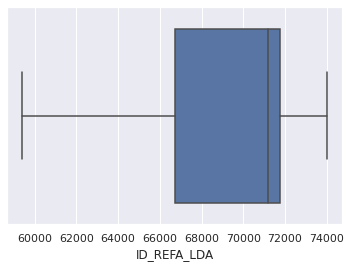

In [20]:
#check outliers
sns.set()
sns.boxplot(data = df , x = df.ID_REFA_LDA);

<a id='cn'></a>
# Extract Columns

In [21]:
#Change datatype of Release data to date datatype 
df['DATE'] = pd.to_datetime(df.DATE)
#make a new column month to more uderstanding the effect of time to data
df['month'] = df['DATE'].dt.month
#make a new column day from Date to drop the date later
df['Day'] = df['DATE'].dt.day

In [22]:
df.shape

(847660, 8)

> - we can see the their is no outliers at all after clearing them

In [23]:
# View the index number and label for each column
for x, y in enumerate(df.columns):
    print(x, y)

0 DATE
1 STATION_NAME
2 ID_REFA_LDA
3 TITLE_CATEGORY
4 NB_VALID
5 NB_Category
6 month
7 Day


In [24]:
#Statistical Information about data after preprocessing
df.describe()

,ID_REFA_LDA,NB_VALID,month,Day
count,847660.000000,847660.000000,847660.000000,847660.000000
mean,69347.075890,771.126769,8.154616,16.934739
std,3874.674618,2789.785948,2.912933,7.497386
min,59420.000000,5.000000,1.000000,7.000000
25%,66731.000000,14.000000,7.000000,10.000000
50%,71184.000000,87.000000,9.000000,16.000000
75%,71756.000000,379.000000,10.000000,24.000000
max,74002.000000,125007.000000,12.000000,31.000000


In [25]:
#correlation of data
df.corr()

,ID_REFA_LDA,NB_VALID,month,Day
ID_REFA_LDA,1.000000,0.105305,-0.013032,-0.002990
NB_VALID,0.105305,1.000000,-0.002996,-0.005830
month,-0.013032,-0.002996,1.000000,0.400086
Day,-0.002990,-0.005830,0.400086,1.000000



<a id='eda'></a>
## Exploratory Data Analysis

<a id='hs'></a>

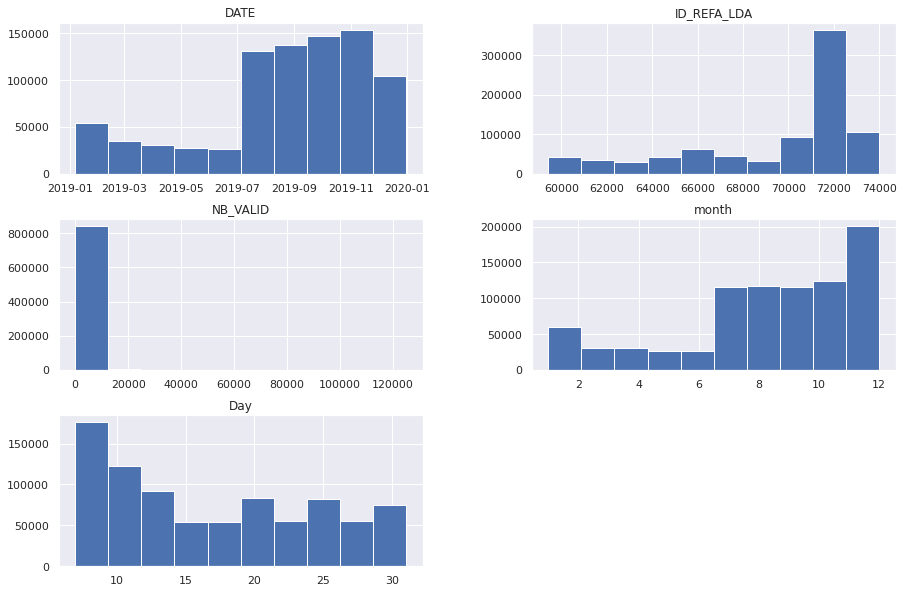

In [26]:
#histogram visualization of data
sns.set();
df.hist(figsize=(15,10));

In [27]:
#group NB_VALID and ID_REFA_LDA by month
date=df.groupby(df.month)[['NB_VALID','ID_REFA_LDA']].sum()
date.head()

,NB_VALID,ID_REFA_LDA
month,,
1,19156587,2.057595e+09
2,25865935,2.101168e+09
3,24864526,2.084706e+09
4,27225443,2.112458e+09
5,22197690,1.878157e+09


<a id='pl'></a>

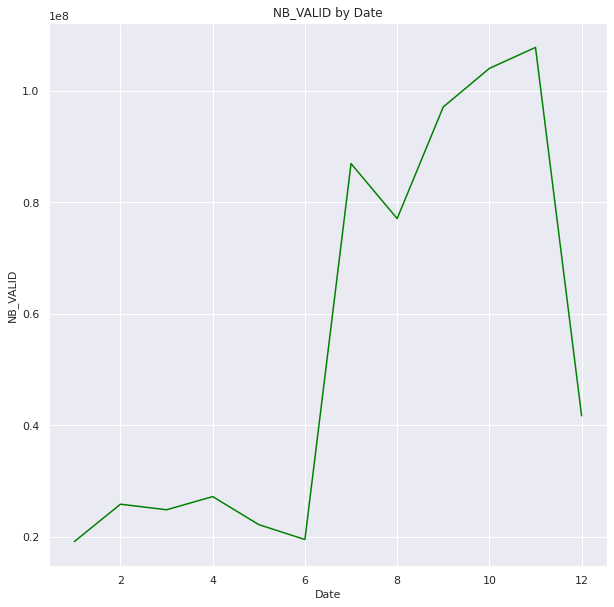

In [28]:
#visualization of Date with NB_VALID
sns.set()
plt.figure(figsize=(10,10))

# x-axis
plt.xlabel('Date', fontsize = 11)
# y-axis
plt.ylabel('NB_VALID', fontsize = 11)
# Title
plt.title('NB_VALID by Date')
# Legend 

# Plot Line chart
plt.plot(date.NB_VALID,color='green')

# Display plot
plt.show()

> - We can notice that NB_valid start increase from june "6 month" and the first 5 months NB_valid doesn't exceed 30 Million validations

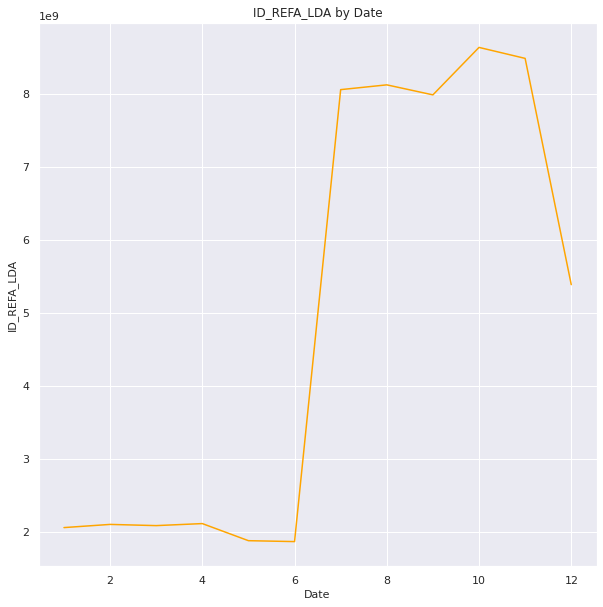

In [29]:
#visualization of DATE with ID_REFA_LDA
sns.set()
plt.figure(figsize=(10,10))

# x-axis
plt.xlabel('Date', fontsize = 11)
# y-axis
plt.ylabel('ID_REFA_LDA', fontsize = 11)
# Title
plt.title('ID_REFA_LDA by Date')
# Legend 

# Plot Line chart
plt.plot(date.ID_REFA_LDA,color='orange')

# Display plot
plt.show()

> - We can notice that ID_REFA_LDA start increase from june "6 month" and the first 5 months NB_valid doesn't exceed 2.3 trillion ID_REFA_LDA

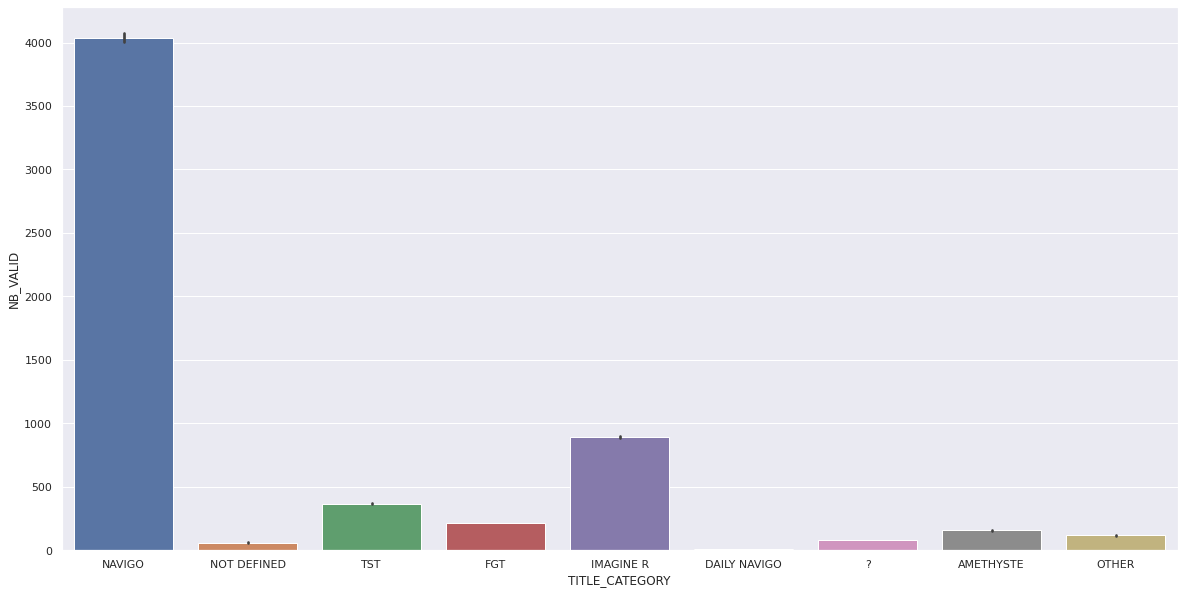

In [30]:
#visualization of TITLE CATEGORY with NB_VALID
sns.set()
plt.figure(figsize=(20,10))
sns.barplot(data=df, x = df.TITLE_CATEGORY, y = df.NB_VALID)
plt.show()

> - NAVIGO title category is the most selled ticket all over the stations

In [31]:
#group station name wiht NB_VALID and ID_REFA_LDA sum
ST_df=df.groupby(df.STATION_NAME)[['NB_VALID','ID_REFA_LDA']].sum()
ST_df

,NB_VALID,ID_REFA_LDA
STATION_NAME,,
ABBESSES,465990,99076184.0
ABLON,171216,80960856.0
ACHERES-GRAND-CORMIER,11577,58475430.0
ACHERES-VILLE,765695,102456768.0
AEROPORT CHARLES DE GAULLE 1,980196,102887208.0
...,...,...
VOLTAIRE (LEON BLUM),1715582,105185500.0
VOSVES,3839,30368350.0
VULAINES-SUR-SEINE-SAMOREAU,7160,44743380.0


In [32]:
#station name with the sum of ID_REFA_LDA
d10 = ST_df.nlargest(10, 'ID_REFA_LDA')
T10 = d10.loc[:,['ID_REFA_LDA']].head(10)
#station name with the sum of NB_VALID
dN10 = ST_df.nlargest(10, 'NB_VALID')
N10 = dN10.loc[:,['NB_VALID']].head(10)

In [33]:
T10

,ID_REFA_LDA
STATION_NAME,
GARE DE LYON,348619110.0
LA DEFENSE-GRANDE ARCHE,337059621.0
BIBLIOTHEQUE FRANCOIS MITTERRAND,227527388.0
SAINT-LAZARE,225814680.0
GARE DU NORD,223513300.0
PORTE MAILLOT,214850790.0
GARE DE L'EST,214719231.0
NATION,206991624.0
AUSTERLITZ,203872910.0


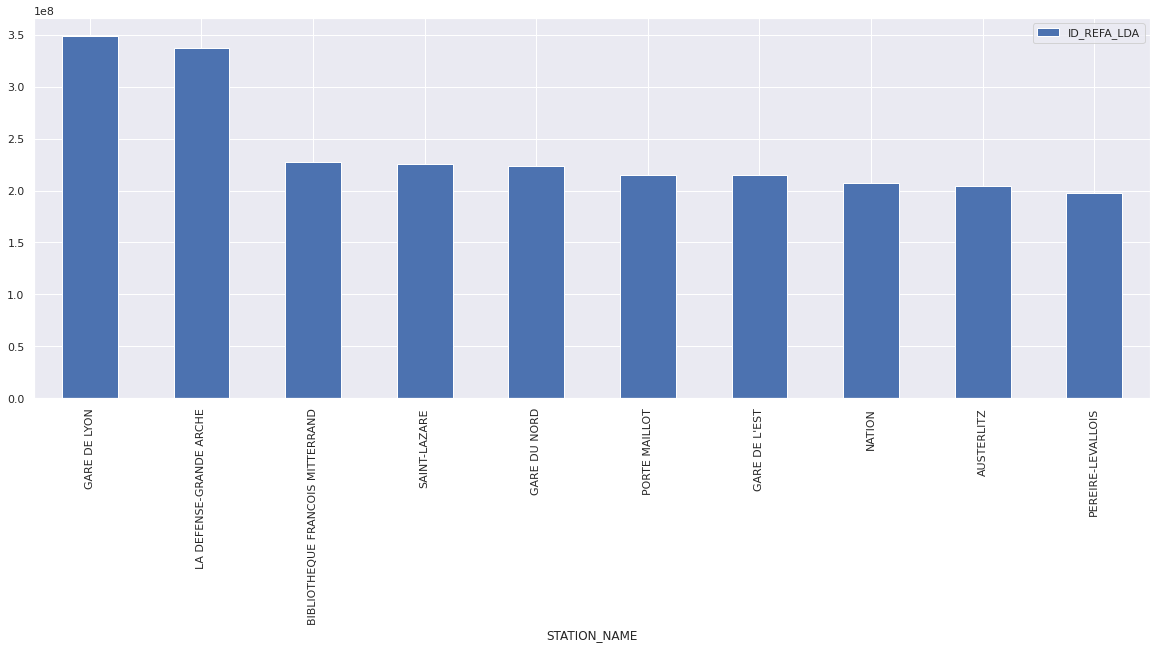

In [34]:
#Visualize bar plot
sns.set()
T10.plot.bar(figsize=(20,7));

> - HOTEL DE VILLE Station has the highest ID_REFA_LDA 

In [35]:
N10

,NB_VALID
STATION_NAME,
SAINT-LAZARE,32477264
GARE DE L'EST,14853378
GARE DU NORD,14651981
LA DEFENSE-GRANDE ARCHE,12303820
GARE DE LYON,7758677
LES HALLES,5833991
BIBLIOTHEQUE FRANCOIS MITTERRAND,5748016
REPUBLIQUE,5549338
CHATELET-LES HALLES,5272294


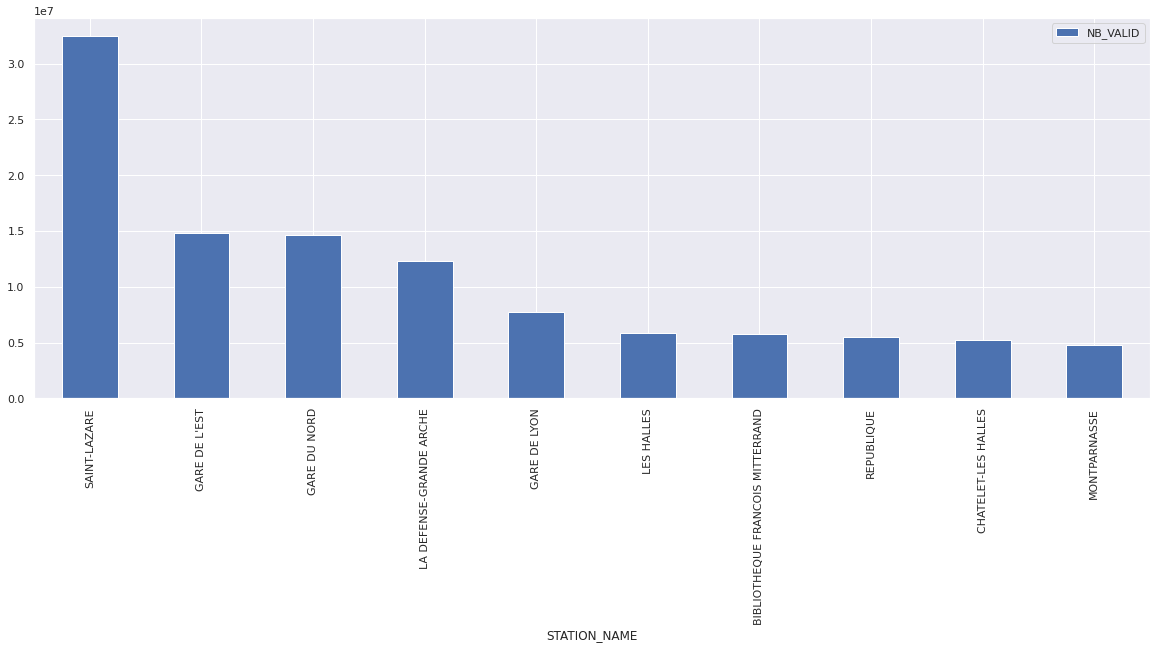

In [36]:
#Visualize bar plot
sns.set()
N10.plot.bar(figsize=(20,7));

> - SAINT-LAZARE Station has the highest NB_VALID 

<a id='htm'></a>

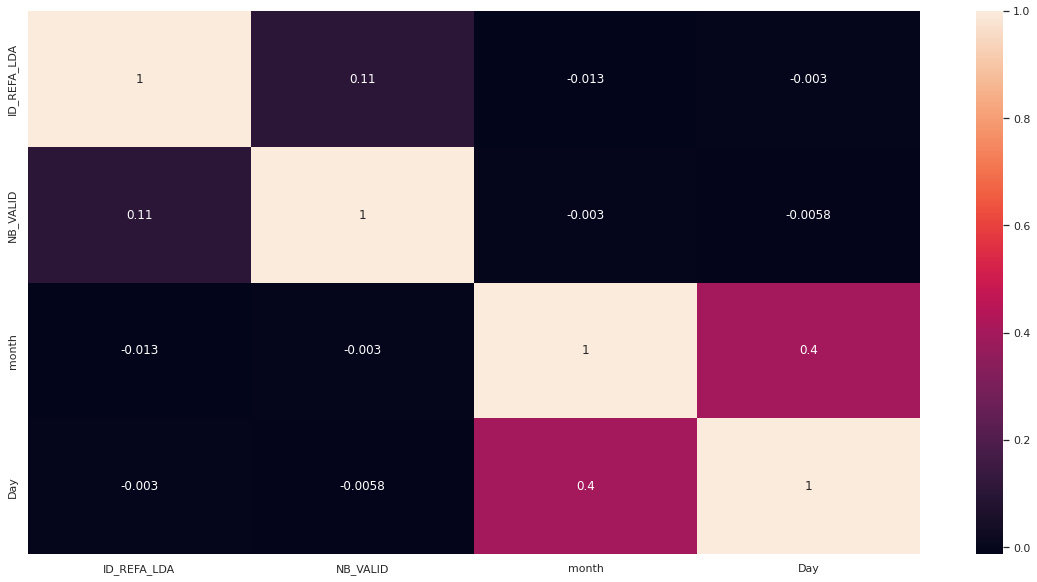

In [37]:
#making heatmap for all data
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [38]:
#one hot encoding for the categorical columns to can be trained in the model
df = pd.get_dummies(df,columns=['TITLE_CATEGORY', 'STATION_NAME'])
df

,DATE,ID_REFA_LDA,NB_VALID,NB_Category,month,Day,TITLE_CATEGORY_?,TITLE_CATEGORY_AMETHYSTE,TITLE_CATEGORY_DAILY NAVIGO,TITLE_CATEGORY_FGT,...,STATION_NAME_VIROFLAY RIVE DROITE,STATION_NAME_VIROFLAY RIVE GAUCHE,STATION_NAME_VIRY-CHATILLON,STATION_NAME_VITRY-SUR-SEINE,STATION_NAME_VOLONTAIRES,STATION_NAME_VOLTAIRE (LEON BLUM),STATION_NAME_VOSVES,STATION_NAME_VULAINES-SUR-SEINE-SAMOREAU,STATION_NAME_WAGRAM,STATION_NAME_YERRES
0,2019-07-21,71242.0,1141,4,7,21,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2019-07-21,71801.0,5,1,7,21,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2019-07-21,71801.0,97,3,7,21,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2019-07-21,71453.0,53,2,7,21,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,2019-07-21,71639.0,25,2,7,21,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883952,2019-04-09,73671.0,84,2,4,9,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
883954,2019-04-09,73653.0,2805,4,4,9,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
883955,2019-04-09,71673.0,14377,4,4,9,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
883956,2019-04-09,71043.0,4613,4,4,9,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
#split the data from the target data 
x = df.drop(labels=['DATE','NB_VALID','NB_Category'], axis=1)
y = df.NB_Category

In [40]:
#X Y shape
print('The X data shape : ', x.shape)
print('The Target shape : ', y.shape)

The X data shape :  (847660, 672)
The Target shape :  (847660,)


<a id='model'></a>

# Deep Learning Model
<ul>
<li><a href="#dr">Dimension Reduction</a></li>
<li><a href="#sd">Spliting Data</a></li>
<li><a href="#bm">Building Model</a></li>
<li><a href="#tm">Training Model</a></li>
<li><a href="#em">Evaluate Model</a></li>
</ul>

<a id='dr'></a>
## Dimension Reduction

In [41]:
# #Import PCA to make dimension reduction
# from sklearn.decomposition import PCA
# #take an object from PCA model
# pca = PCA(n_components=0.95)
# #train PCA on the data
# x_pca = pca.fit_transform(x)
# #Shape of the data
# print('Shape of the Data before PCA : ', x.shape)
# print('Shape of the Data after PCA : ', x_pca.shape)

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x = scaler.fit_transform(x)

<a id='sd'></a>
## Spliting Data

In [43]:
#split data to x_train, x_test, y_train, y_test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=40,shuffle=True)

In [44]:
#clear memory
del df
del x
del y
del l
del me
del mh
del h
del maxx
del d10
del ST_df
del T10
del dN10
del N10

In [45]:
#Shape of the data
print('Shape of the x_train data : ', x_train.shape)
print('Shape of the y_train data : ', y_train.shape)
print('Shape of the x_test data : ', x_test.shape)
print('Shape of the y_test data : ', y_test.shape)

Shape of the x_train data :  (762894, 672)
Shape of the y_train data :  (762894,)
Shape of the x_test data :  (84766, 672)
Shape of the y_test data :  (84766,)


<a id='bm'></a>

## Building Model 

In [46]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization,Dropout
import tensorflow.keras as tf

In [74]:
# Build the neural network
model = Sequential([
    
Dense(1024, activation='relu'), # Hidden 1
BatchNormalization(),# Hidden 2
Dense(512, activation='relu'), # Hidden 3
Dense(256, activation='relu'), # Hidden 6
Dense(256, activation='relu'), # Hidden 6
Dense(128, activation='relu'), # Hidden 8
Dense(64, activation='relu'),# Hidden 10
Dense(32, activation='relu'),# Hidden 11
Dense(5, activation = 'softmax')    
])

<a id='tm'></a>

## Training Model

In [48]:
model.compile(optimizer=tf.optimizers.Adam(),
                loss=tf.losses.SparseCategoricalCrossentropy(),
                metrics=['accuracy'])

In [49]:
history = model.fit(x = x_train, y = y_train, epochs = 65 , validation_split=0.15, batch_size = 64)

2022-09-14 07:42:26.238653: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/65
10133/10133 [==============================] - 123s 12ms/step - loss: 0.5695 - accuracy: 0.7598 - val_loss: 0.4822 - val_accuracy: 0.7955
Epoch 2/65
10133/10133 [==============================] - 121s 12ms/step - loss: 0.4674 - accuracy: 0.8033 - val_loss: 0.4504 - val_accuracy: 0.8121
Epoch 3/65
10133/10133 [==============================] - 120s 12ms/step - loss: 0.4255 - accuracy: 0.8214 - val_loss: 0.4036 - val_accuracy: 0.8301
Epoch 4/65
10133/10133 [==============================] - 120s 12ms/step - loss: 0.4016 - accuracy: 0.8300 - val_loss: 0.3865 - val_accuracy: 0.8359
Epoch 5/65
10133/10133 [==============================] - 123s 12ms/step - loss: 0.3868 - accuracy: 0.8355 - val_loss: 0.3794 - val_accuracy: 0.8394
Epoch 6/65
10133/10133 [==============================] - 121s 12ms/step - loss: 0.3762 - accuracy: 0.8399 - val_loss: 0.3709 - val_accuracy: 0.8437
Epoch 7/65
10133/10133 [==============================] - 121s 12ms/step - loss: 0.3681 - accuracy: 0.8439

<a id='em'></a>

## Evaluate Model

In [50]:
model.evaluate(x_test,y_test)

2649/2649 [==============================] - 8s 3ms/step - loss: 0.3122 - accuracy: 0.8815


[0.31220489740371704, 0.8815091252326965]

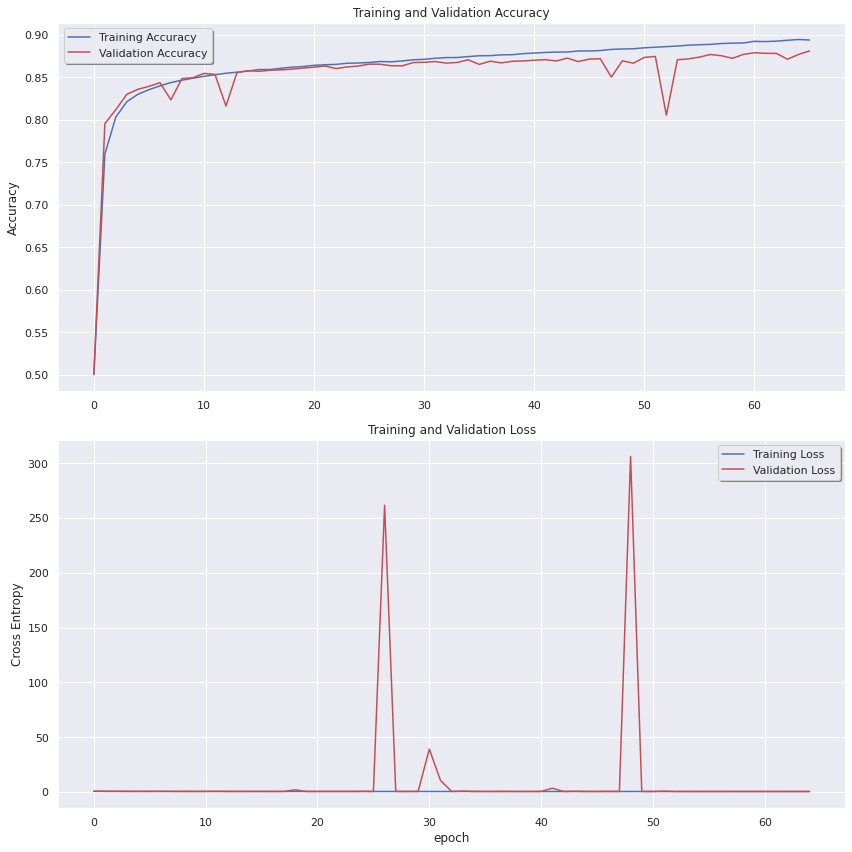

In [70]:
sns.set()
acc = [0.5] + history.history['accuracy']
val_acc = [0.5] + history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(acc,color='b', label='Training Accuracy')
ax1.plot(val_acc,color='r', label='Validation Accuracy')
ax1.legend(loc='best', shadow=True)
ax1.set_ylabel('Accuracy')
ax1.set_title('Training and Validation Accuracy')

ax2.plot(loss,color='b', label='Training Loss')
ax2.plot(val_loss,color='r', label='Validation Loss')
ax2.legend(loc='best', shadow=True)
ax2.set_ylabel('Cross Entropy')
ax2.set_title('Training and Validation Loss')
ax2.set_xlabel('epoch')
plt.tight_layout()

plt.show()

In [52]:
#predict for Test set
y_pred = model.predict(x_test)

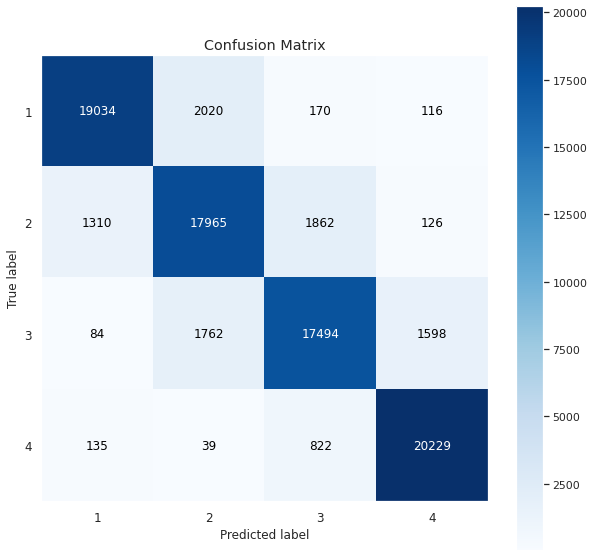

In [53]:
#Confusion_Matrix for Test
from scikitplot.metrics import plot_confusion_matrix
cm = plot_confusion_matrix(y_test.ravel(), np.argmax(y_pred,axis=1),figsize=(10,10))

In [54]:
#prediction for Train set
x_train_prediction = model.predict(x_train)

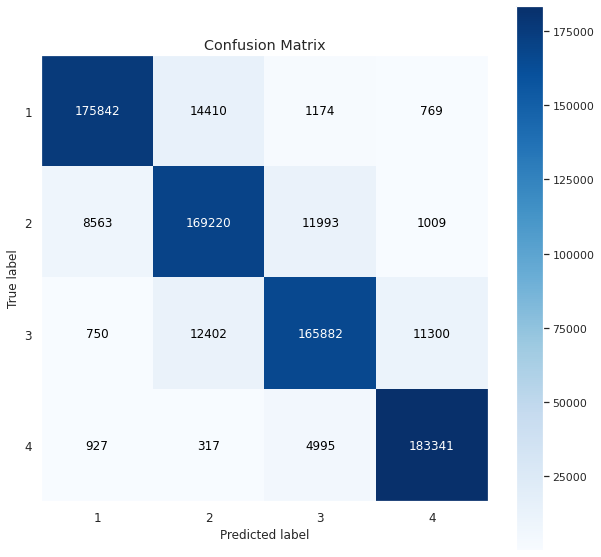

In [55]:
#Confusion_Matrix for Train
cmt = plot_confusion_matrix(y_train.ravel(), np.argmax(x_train_prediction,axis=1),figsize=(10,10))

In [71]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# accuracy score on training data
training_data_accuracy = accuracy_score(y_train.ravel(),np.argmax(x_train_prediction,axis=1))
print('Accuracy score of training data : {}%\n'.format(round(training_data_accuracy,5)*100))

#Classification Report Training
print('\n Classification Report in Training: \n',classification_report(y_train.ravel(), np.argmax(x_train_prediction,axis=1)))

print('===========================================================================\n===========================================================================')

# accuracy score on Test data
test_data_accuracy = accuracy_score(y_test.ravel(), np.argmax(y_pred,axis=1))
print('Accuracy score of test data : {}% \n'.format(round(test_data_accuracy,5)*100))

#Classification Report Test
print('\n Classification Report in Training: \n',classification_report(y_test.ravel(), np.argmax(y_pred,axis=1)))

Accuracy score of training data : 91.007%


 Classification Report in Training: 
               precision    recall  f1-score   support

           1       0.94      0.91      0.93    192195
           2       0.86      0.89      0.87    190785
           3       0.90      0.87      0.89    190334
           4       0.93      0.97      0.95    189580

    accuracy                           0.91    762894
   macro avg       0.91      0.91      0.91    762894
weighted avg       0.91      0.91      0.91    762894

Accuracy score of test data : 88.151% 


 Classification Report in Training: 
               precision    recall  f1-score   support

           1       0.93      0.89      0.91     21340
           2       0.82      0.84      0.83     21263
           3       0.86      0.84      0.85     20938
           4       0.92      0.95      0.93     21225

    accuracy                           0.88     84766
   macro avg       0.88      0.88      0.88     84766
weighted avg       0.88 

In [72]:
model.save('v3_model.h5')

In [73]:
model.save_weights('v2_weights.h5')